<a href="https://colab.research.google.com/github/pdr-tuche/training-python/blob/main/sele%C3%A7%C3%A3o_olimpica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#acompanhando o desenvolvimento de um esporte:
a ideia é montar um histograma da quantidade de medalhas ganhas pelo brasil em olimpiadas até 2016


---

dia de pesquisa: 20/ 11/ 2020

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/athlete_events.csv",encoding= "ISO-8859-1", sep=',')
data.drop("Games",axis=1,inplace=True)
data.drop("Season",axis=1,inplace=True)
data.drop("NOC",axis=1,inplace=True)

In [ ]:
fut = data.loc[data['Event'] == "Football Men's Football"]
fute = fut.loc[fut['Team']=='Brazil']
fute['Medal'].fillna('Nenhuma',inplace =True)
futeb = fute.loc[fute['Medal']!='Nenhuma']
#aplicando uma 'gambiarra, consegui descobrir quais medalhas e em quais anos o brasil conquistou medalha
# eu fui comparando com == para descobrir a medalha e depois troquei o sinal para != para eliminar aql resultado e assim sucessivamente
medalhistas_1984 = futeb.loc[futeb['Year']!=1984]#84 silver
medalhistas_1988 = medalhistas_1984.loc[medalhistas_1984['Year']!=1988]#88 silver
medalhistas_1996 = medalhistas_1988.loc[medalhistas_1988['Year']!=1996]#96 bronze
medalhistas_2008 = medalhistas_1996.loc[medalhistas_1996['Year']!=2008]#08 bronze
medalhistas_2012 = medalhistas_2008.loc[medalhistas_2008['Year']!=2012]#12 silver
medalhistas_2016 = medalhistas_2012 #16 Gold

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


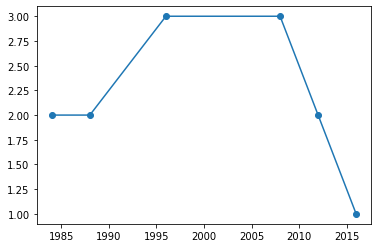

In [ ]:
ano=[1984,1988,1996,2008,2012,2016]
medalhas=[2,2,3,3,2,1]
plt.scatter(ano,medalhas)
plt.plot(ano,medalhas)

grafico da evolução da seleção brasileira. eixo x a evolução temporal e no eixo y as medalhas, onde 1 equivale a ouro, 2 prata e 3 bronze

## Evolução do peso dos jogadores


---

evolucao do peso dos jogadores do sec XX

media de peso todos jogadores 73.62745098039215
media de peso jogadores 2008 74.29411764705883
media de peso jogadores 2012 74.6470588235294
media de peso jogadores 2016 71.94117647058823


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7320dc748>]],
      dtype=object)

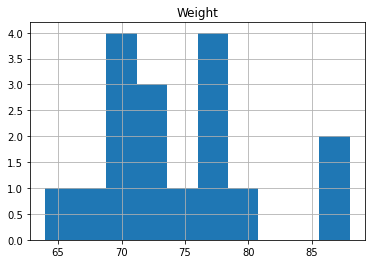

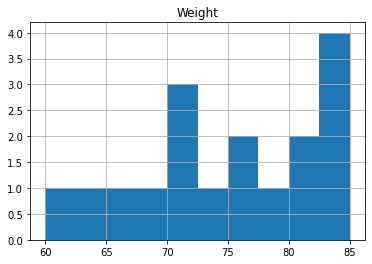

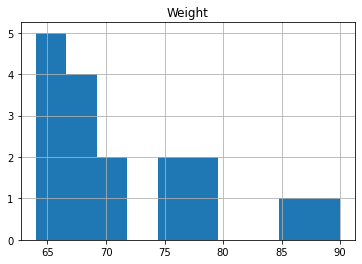

In [ ]:
print('media de peso todos jogadores',medalhistas_1996['Weight'].mean())
only2008 = medalhistas_1996.loc[medalhistas_1996['Year'] == 2008]
print('media de peso jogadores 2008',only2008['Weight'].mean())
only2012 = medalhistas_1996.loc[medalhistas_1996['Year'] == 2012]
print('media de peso jogadores 2012',only2012['Weight'].mean())
only2016 = medalhistas_1996.loc[medalhistas_1996['Year'] == 2016]
print('media de peso jogadores 2016',only2016['Weight'].mean())

only2008.hist(column='Weight',bins=10)
only2012.hist(column='Weight',bins=10)
only2016.hist(column='Weight',bins=10)

as distribuções de peso ficaram mais concentradas em 2016, logo, pode-se afirmar que quanto menor o peso, mais ágil é o jogador?


> o fato de ter jogadores mais leves pode ter sido um fator para melhor desempenho futebolistico e assim conquistar a medalha olimpica?



#"Brincando" com dados






In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/athlete_events.csv",encoding= "ISO-8859-1", sep=',')
data.drop("Games",axis=1,inplace=True)
data.drop("Season",axis=1,inplace=True)

In [ ]:
brasileiros = data.loc[data['Team']=='Brazil'] #dataframe de brasileiros
rio2016 = brasileiros.loc[brasileiros['Year'] == 2016] #dataframe de brasileiros nas olimpiadas de 2016
rio2016['Medal'].fillna('Nenhuma',inplace =True) #modificando valor NaN por Nenhuma medalha
medalhistas = rio2016.loc[rio2016['Medal']!='Nenhuma']#dataframe de medalhistas brasileiros rio2016
medalhistas['Medal'].value_counts() #quantidade de medalhistas brasileiros(jogadores de esportes coletivos sao contados individualmente)
#o brasil ficou com 7ouros 6pratas e 6bronzes na olimpiada de 2016
medalhistas.head(1)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
9260,5093,William Peixoto Arjona,M,37.0,186.0,78.0,Brazil,BRA,2016,Rio de Janeiro,Volleyball,Volleyball Men's Volleyball,Gold


In [ ]:
#pensei em retirar os jogadores de esportes coletivos e depois adicionar mais duas medalhas ao medalhas_brasil
temp = medalhistas.loc[medalhistas['Event']!="Football Men's Football"]
medalhas_brasil = temp.loc[temp['Event']!="Volleyball Men's Volleyball"]
# depois de retirar todos os jogadores de futebol e volei, irei adicionar mais duas medalhas individuais aos dados
#medalhas_brasil.append("9998,futebol,NaN,NaN,NaN,NaN,Brazil,BRA,2016,Rio de Janeiro,Futebol,Futebol,Gold") ->nao é assim que se adiciona kkkk

TypeError: ignored